# Day 8 – Session 1: Lecture on Motion Planning

Why smooth motion? Robotic arms require smooth, continuous trajectories to avoid jerky movements that can cause wear or instability. Smooth motion also helps in carrying fragile objects. We achieve smooth motion by interpolating between start and goal configurations in small steps.

We introduce linear interpolation over joint angles. Given start joint angles and goal joint angles, we create intermediate steps that blend them linearly. This ensures the robot moves gradually rather than jumping instantly.

In [ ]:
!pip install pybullet matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 6.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pybullet as p, pybullet_data


In [ ]:
# Define initial and goal joint angles (2-joint example)
start_angles = np.array([0.0, 0.0])
goal_angles  = np.array([np.pi/2, np.pi/4])
steps = 5

In [ ]:
# Linear interpolation function for joint trajectories
def linear_interpolation(start, goal, steps):
    # Returns an (steps x len(start)) array of intermediate angles
    return np.linspace(start, goal, steps)

angles_interp = linear_interpolation(start_angles, goal_angles, steps)
print("Interpolated joint angles ({} steps):".format(steps))
for i, ang in enumerate(angles_interp):
    print(f"  Step {i}: {ang}")


Interpolated joint angles (5 steps):
  Step 0: [0. 0.]
  Step 1: [0.39269908 0.19634954]
  Step 2: [0.78539816 0.39269908]
  Step 3: [1.17809725 0.58904862]
  Step 4: [1.57079633 0.78539816]


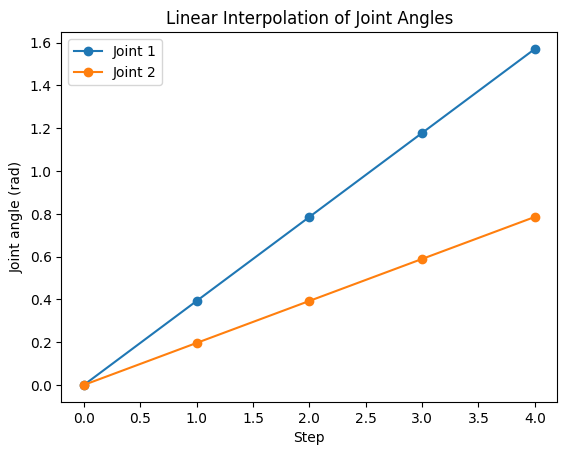

In [ ]:
# Plot the joint angles over time (steps) for each joint
t = np.arange(steps)
plt.plot(t, angles_interp[:,0], 'o-', label='Joint 1')
plt.plot(t, angles_interp[:,1], 'o-', label='Joint 2')
plt.xlabel('Step')
plt.ylabel('Joint angle (rad)')
plt.title('Linear Interpolation of Joint Angles')
plt.legend()
plt.show()

**🤔 Food for thought**

1. Smooth vs Fast:
   - If you double the number of interpolation steps, the motion is smoother but takes longer.  
     *When might you prefer fewer steps? When is smoothness critical?*

2. Inverse Kinematics (IK) Thought Experiment:  
   - Imagine a 6‑DoF arm reaching into a narrow shelf.  
     *Why might choosing the “elbow‑up” IK solution versus “elbow‑down” matter?*

3. Optional Brain‑Teaser (No code required):  
   - Sketch the **end‑effector path** when you linearly interpolate joint‑angles of a 2‑link arm from `[0°,0°]` to `[90°,0°]`.  
   - Is that path a straight line in Cartesian space? Why / why not?


In [ ]:
# Compare different numbers of steps
interp_2 = linear_interpolation(start_angles, goal_angles, 2)
interp_10 = linear_interpolation(start_angles, goal_angles, 10)
print("2-step interpolation:\n", interp_2)
print("10-step interpolation:\n", interp_10)


2-step interpolation:
 [[0.         0.        ]
 [1.57079633 0.78539816]]
10-step interpolation:
 [[0.         0.        ]
 [0.17453293 0.08726646]
 [0.34906585 0.17453293]
 [0.52359878 0.26179939]
 [0.6981317  0.34906585]
 [0.87266463 0.43633231]
 [1.04719755 0.52359878]
 [1.22173048 0.61086524]
 [1.3962634  0.6981317 ]
 [1.57079633 0.78539816]]


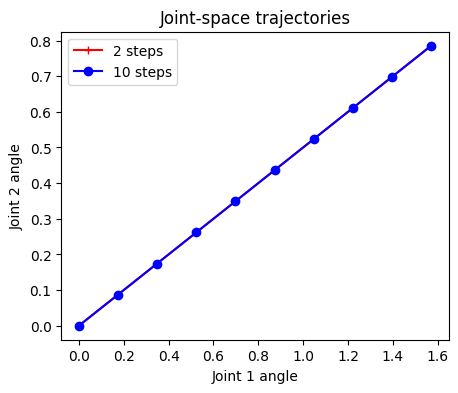

In [ ]:
# Show trajectories in joint space
plt.figure(figsize=(5,4))
plt.plot(interp_2[:,0], interp_2[:,1], 'r-+', label='2 steps')
plt.plot(interp_10[:,0], interp_10[:,1], 'b-o', label='10 steps')
plt.xlabel('Joint 1 angle')
plt.ylabel('Joint 2 angle')
plt.title('Joint-space trajectories')
plt.legend()
plt.show()


In [ ]:
# Compute maximum joint change (jump) for different step counts
for n in [2, 5, 10]:
    traj = linear_interpolation(start_angles, goal_angles, n)
    jumps = np.linalg.norm(np.diff(traj, axis=0), axis=1)
    print(f"{n} steps -> max jump between steps: {np.max(jumps):.3f} rad")

2 steps -> max jump between steps: 1.756 rad
5 steps -> max jump between steps: 0.439 rad
10 steps -> max jump between steps: 0.195 rad


In [ ]:
# (Advanced) Example: using inverse kinematics to reach a Cartesian target
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
kukaId = p.loadURDF("kuka_iiwa/model.urdf", useFixedBase=True)
target_pos = [0.2, 0.0, 0.3]  # goal in Cartesian space
ik_solution = p.calculateInverseKinematics(kukaId, 6, target_pos)
print("IK joint angles for target:", np.round(ik_solution, 3))
p.disconnect()

IK joint angles for target: [-0.     0.471  0.    -2.528  0.     0.541  0.   ]


In [ ]:
# (Optional) Alternative interpolation (smooth easing) using a sinusoidal blend
def sinusoidal_interpolation(start, goal, steps):
    t = np.linspace(0, np.pi, steps)
    alpha = (1 - np.cos(t)) / 2  # ease-in-out curve from 0 to 1
    return np.outer(1-alpha, start) + np.outer(alpha, goal)

interp_sin = sinusoidal_interpolation(start_angles, goal_angles, steps)
print("Sinusoidal interpolation angles:\n", np.round(interp_sin, 3))

Sinusoidal interpolation angles:
 [[0.    0.   ]
 [0.23  0.115]
 [0.785 0.393]
 [1.341 0.67 ]
 [1.571 0.785]]


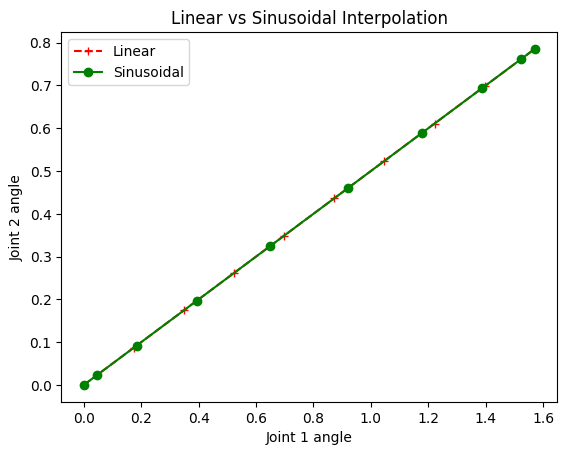

In [ ]:
# Plot linear vs sinusoidal interpolation
steps = 10
traj_lin = linear_interpolation(start_angles, goal_angles, steps)
traj_sin = sinusoidal_interpolation(start_angles, goal_angles, steps)
plt.plot(traj_lin[:,0], traj_lin[:,1], 'r--+', label='Linear')
plt.plot(traj_sin[:,0], traj_sin[:,1], 'g-o', label='Sinusoidal')
plt.xlabel('Joint 1 angle')
plt.ylabel('Joint 2 angle')
plt.legend()
plt.title('Linear vs Sinusoidal Interpolation')
plt.show()

In [ ]:
# Simulate a 3-joint case for variety
start_angles_3 = np.array([0.0, 0.5, -0.5])
goal_angles_3  = np.array([1.0, -0.2, 0.3])
interp_3 = linear_interpolation(start_angles_3, goal_angles_3, 6)
print("3-joint interpolation (6 steps):")
print(interp_3)

3-joint interpolation (6 steps):
[[ 0.    0.5  -0.5 ]
 [ 0.2   0.36 -0.34]
 [ 0.4   0.22 -0.18]
 [ 0.6   0.08 -0.02]
 [ 0.8  -0.06  0.14]
 [ 1.   -0.2   0.3 ]]


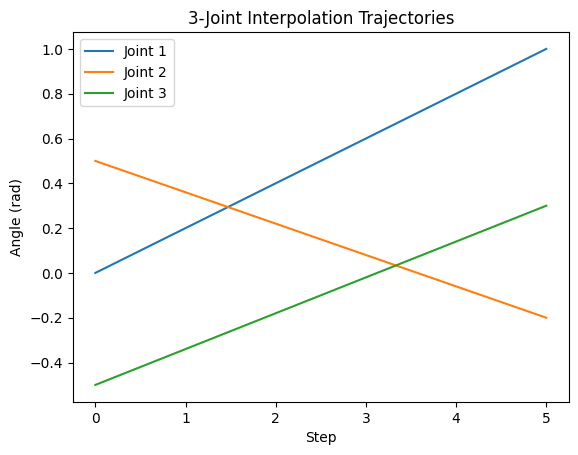

In [ ]:
# Plot each joint trajectory for the 3-joint arm
for i in range(3):
    plt.plot(interp_3[:, i], label=f'Joint {i+1}')
plt.xlabel('Step')
plt.ylabel('Angle (rad)')
plt.title('3-Joint Interpolation Trajectories')
plt.legend()
plt.show()

In [ ]:
# Effect of number of steps on smoothness
for n in [3, 6, 12]:
    traj = linear_interpolation(start_angles_3, goal_angles_3, n)
    max_diff = np.max(np.abs(np.diff(traj, axis=0)))
    print(f"{n} steps -> max change in any joint: {max_diff:.3f} rad")


3 steps -> max change in any joint: 0.500 rad
6 steps -> max change in any joint: 0.200 rad
12 steps -> max change in any joint: 0.091 rad


In [ ]:
# (Simulation) Apply interpolated positions to the robot (joint 0,1 only for demo)
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
kukaId = p.loadURDF("kuka_iiwa/model.urdf", useFixedBase=True)
for n in [3, 6, 12]:
    traj = linear_interpolation(start_angles_3, goal_angles_3, n)
    for angles in traj:
        for j in range(3):
            p.resetJointState(kukaId, j, angles[j])
        p.stepSimulation()
    print(f"Applied trajectory with {n} steps.")
p.disconnect()

Applied trajectory with 3 steps.
Applied trajectory with 6 steps.
Applied trajectory with 12 steps.
